In [ ]:
!pip install finance-datareader

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

In [4]:
df = fdr.DataReader('005930', '2020', '2021')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [5]:
# 전일 대비 수익률
df['pct_change'] = df['Close'].pct_change()
df.head()

,Open,High,Low,Close,Volume,Change,pct_change
Date,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921,0.017921


In [6]:
df['Diff'] = df['Close'].diff()
df.head()

,Open,High,Low,Close,Volume,Change,pct_change,Diff
Date,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,0.005435,300.0
2020-01-06,54900,55600,54600,55500,10278951,0.000000,0.000000,0.0
2020-01-07,55700,56400,55600,55800,10009778,0.005405,0.005405,300.0
2020-01-08,56200,57400,55900,56800,23501171,0.017921,0.017921,1000.0


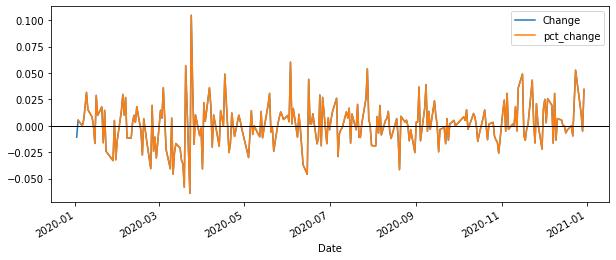

In [8]:
df[['Change', 'pct_change']].plot(figsize=(10,4))
plt.axhline(0, c='k', lw=1)

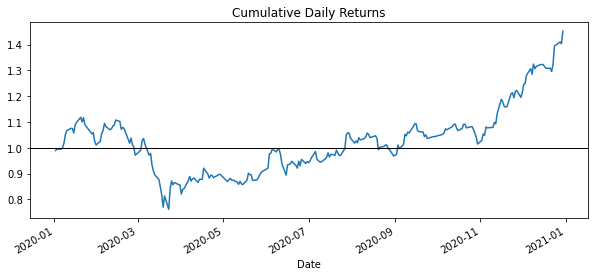

In [10]:
# 누적수익률
# 과거 수익률 * ... * 현재 수익률
cum_dailly_return = (df['Change'] + 1).cumprod()
cum_dailly_return.plot(figsize=(10,4), title='Cumulative Daily Returns')
plt.axhline(1, c='k', lw=1)

<AxesSubplot:title={'center':'Simple Moving Average'}, xlabel='Date'>

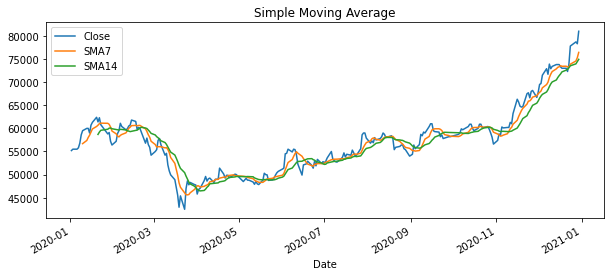

In [13]:
# 이동평균 Simple Moving Average
df['SMA7'] = df['Close'].rolling(7).mean()
df['SMA14'] = df['Close'].rolling(14).mean()

df[['Close', 'SMA7', 'SMA14']].plot(figsize=(10,4), title='Simple Moving Average')

<AxesSubplot:title={'center':'Cumulative moving average'}, xlabel='Date'>

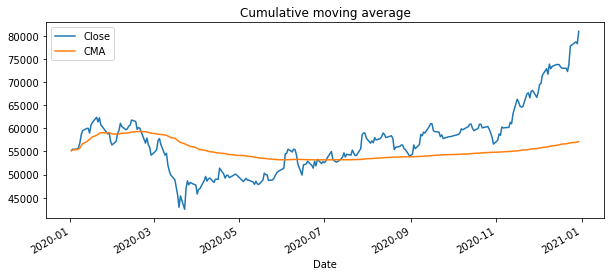

In [15]:
# 누적이동평균 Cumulative moving average
df['CMA'] = df['Close'].expanding().mean()
df[['Close', 'CMA']].plot(figsize=(10,4), title='Cumulative moving average')

<AxesSubplot:title={'center':'Exponential Moving Average'}, xlabel='Date'>

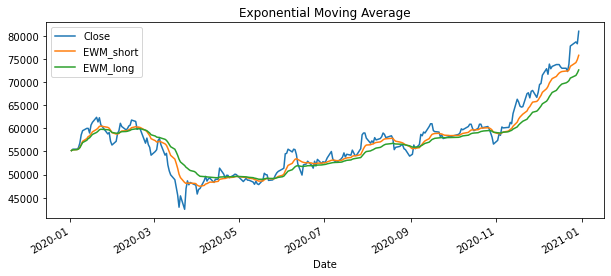

In [18]:
# 지수이동평균 (가중치 부여) Exponential Moving Average
df['EWM_short'] = df['Close'].ewm(span=12).mean()
df['EWM_long'] = df['Close'].ewm(span=26).mean()

df[['Close', 'EWM_short', 'EWM_long']].plot(figsize=(10, 4), title='Exponential Moving Average')

<AxesSubplot:xlabel='Date'>

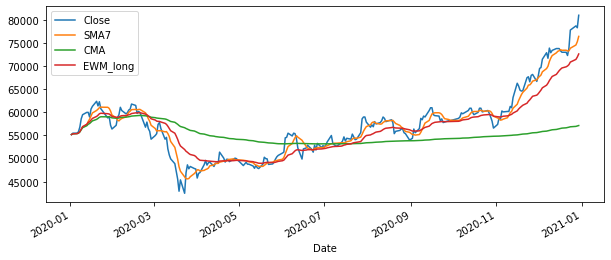

In [19]:
df[['Close', 'SMA7', 'CMA', 'EWM_long']].plot(figsize=(10,4))

In [29]:
# 종가에 대한 월간 평균
df['Close'].resample('M').mean()

Date
2020-01-31    58815.000000
2020-02-29    59085.000000
2020-03-31    50168.181818
2020-04-30    49045.000000
2020-05-31    49100.000000
2020-06-30    52986.363636
2020-07-31    54726.086957
2020-08-31    56980.000000
2020-09-30    58176.190476
2020-10-31    59736.842105
2020-11-30    63419.047619
2020-12-31    73619.047619
Freq: M, Name: Close, dtype: float64